In [1]:
import pandas as pd
 
df1 = pd.read_excel(file name)

In [3]:
df1.drop('UNIQUE_ID', axis=1, inplace=True)

In [4]:
df2=df1[df1.columns[11]]

In [5]:
df1.drop('Customer', axis=1, inplace=True)

In [6]:
names=['CREDIT_CARD','CASH_DEPOSIT','ATM_WITHDRAWAL','ATM_DEPOSIT','BILLS','DEBIT_CARD','OUTWARD_TRANSFER','INWARD_TRANSFER','CASH_WITHDRAWAL','CREDIT_CHEQUES','DEBIT_CHEQUES']

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
array2=scaler.transform(df1)
df_standardScaled= pd.DataFrame(array2, columns=names)
df_standardScaled

,CREDIT_CARD,CASH_DEPOSIT,ATM_WITHDRAWAL,ATM_DEPOSIT,BILLS,DEBIT_CARD,OUTWARD_TRANSFER,INWARD_TRANSFER,CASH_WITHDRAWAL,CREDIT_CHEQUES,DEBIT_CHEQUES
0,13.288852,4.049718,2.928861,3.674210,1.652925,0.401977,1.172281,-0.016748,-0.171479,-0.074236,-0.122288
1,-0.071589,-0.205240,-0.269490,-0.299728,-0.154554,-0.256888,0.054030,-0.022797,-0.171479,-0.074236,-0.122288
2,-0.071589,-0.205240,-0.343467,-0.277092,-0.169435,-0.298838,-0.125883,-0.033319,-0.171479,-0.074236,-0.122288
3,-0.071589,-0.205240,-0.349860,0.149180,-0.173152,-0.298838,-0.127533,-0.034433,-0.171479,-0.074236,-0.122288
4,-0.071589,-0.205240,0.466624,-0.279371,-0.173152,-0.298838,-0.127533,-0.034433,-0.171479,-0.074236,-0.122288
...,...,...,...,...,...,...,...,...,...,...,...
4755,-0.071589,-0.126718,0.058382,-0.122139,-0.173152,-0.298838,-0.127533,-0.034433,-0.171479,-0.074236,-0.122288
4756,-0.071589,0.205346,-0.216519,0.360190,0.987360,-0.065680,-0.127533,-0.033256,-0.171479,-0.074236,-0.122288
4757,-0.071589,0.015908,-0.295062,1.918835,0.240303,4.714457,-0.072499,-0.032957,-0.171479,-0.074236,-0.122288
4758,-0.071589,-0.205240,-0.077699,0.651866,-0.032738,0.287634,-0.043062,-0.033152,-0.171479,-0.074236,-0.122288


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_standardScaled,df2,test_size=0.2,random_state=0)

In [20]:
from sklearn import svm
clf = svm.SVC(random_state=0,probability= True)
clf.fit(x_train, y_train)

SVC(probability=True, random_state=0)

In [10]:
y_predict=clf.predict(x_test)

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.9401260504201681
0.978021978021978
0.9044715447154471
0.9398099260823654
0.9413662071403323


In [21]:
y_prob=clf.predict_proba(x_test)
print(roc_auc_score(y_test,y_prob[:,1]))

0.9906526157652881


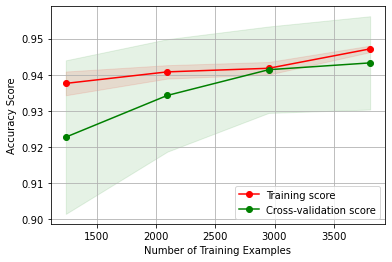

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, scoring,train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,scoring=scoring, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title('')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Accuracy Score')
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    
    plt.legend(loc='lower right')
    plt.savefig('C:\\Users\\Samer\\Documents\\My Project\\Bank Eti7ad Project\\Article\\revised for MIP\\figures\\learning curve SVM normalized data.png')
    plt.show()

plot_learning_curve(clf,df_standardScaled,df2,scoring='accuracy')

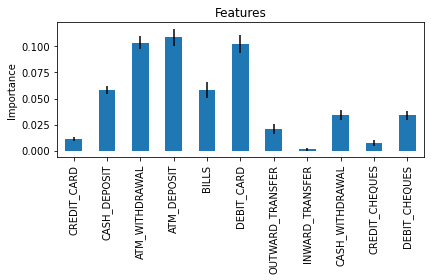

In [13]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
result = permutation_importance(
    clf, x_test, y_test, n_repeats=10, random_state=0, n_jobs=2
)

importances = pd.Series(result.importances_mean, index=names)
fig, ax = plt.subplots()
importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Features")
ax.set_ylabel("Importance")
fig.tight_layout()

plt.savefig('C:\\Users\\Samer\\Documents\\My Project\\Bank Eti7ad Project\\Article\\revised for MIP\\figures\\feature importance of SVM normalized data.png')
plt.show()

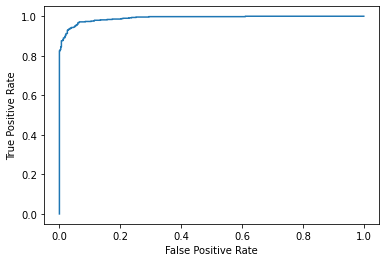

In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob[:,1])

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('C:\\Users\\Samer\\Documents\\My Project\\Bank Eti7ad Project\\Article\\revised for MIP\\figures\\roc curve of SVM normalized data.png')
plt.show()